In [1]:
from model import UNet
import torch

In [2]:
Unet_model = UNet()
Unet_model.load_state_dict(torch.load('models/Unet_model.pth'))
Unet_model.eval()

UNet(
  (C1): Conv(
    (layer): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0.3, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Dropout(p=0.4, inplace=False)
      (7): LeakyReLU(negative_slope=0.01)
    )
  )
  (D1): DownSampling(
    (Down): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (C2): Conv(
    (layer): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0.3, inplace=False)
      (3): LeakyReLU(

In [3]:
import numpy as np

In [4]:
def trans_freq_dom(image):
    image_dft = np.fft.fftshift(np.fft.fft2(image))
    image_dft_log = np.log(np.abs(image_dft))
    return image_dft_log

In [5]:
from loader import train_dataset, test_dataset, valid_dataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

(-0.5, 127.5, 127.5, -0.5)

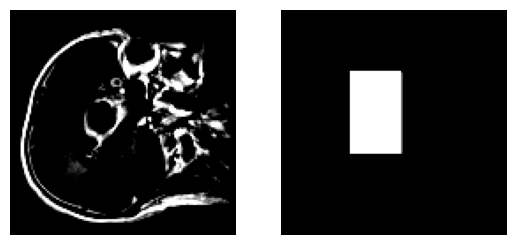

In [6]:
image, mask = train_dataset[1]

fig, ax = plt.subplots(1, 2)

ax[0].imshow(image.numpy().squeeze(), cmap='gray')
ax[0].axis('off')
ax[1].imshow(mask.numpy().squeeze(), cmap='gray')
ax[1].axis('off')

(-0.5, 127.5, 127.5, -0.5)

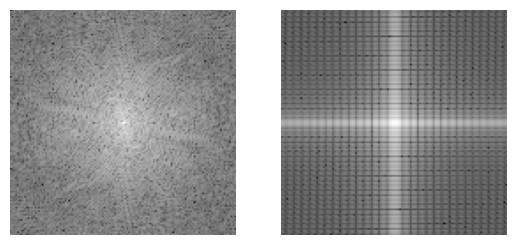

In [7]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(trans_freq_dom(image.numpy().squeeze()), cmap='gray')
ax[0].axis('off')
ax[1].imshow(trans_freq_dom(mask.numpy().squeeze()), cmap='gray')
ax[1].axis('off')

In [8]:
R1, R2, R3, R4, Y1, O1, O2, O3, O4, Y2 = Unet_model.visualize(image.reshape(1,1,128,128))

In [9]:
R1.shape

torch.Size([1, 16, 128, 128])

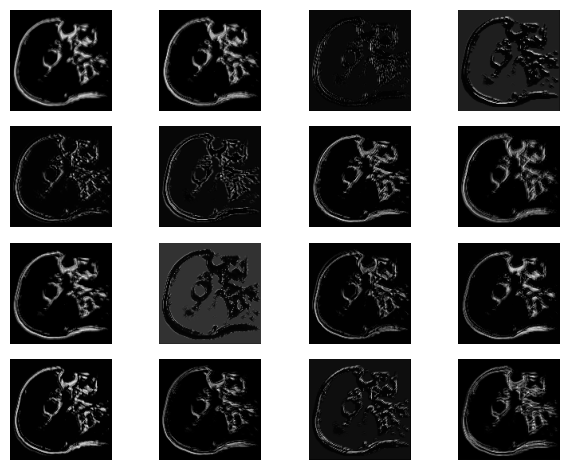

In [10]:
n_x, n_y = 4, 4

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(R1[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

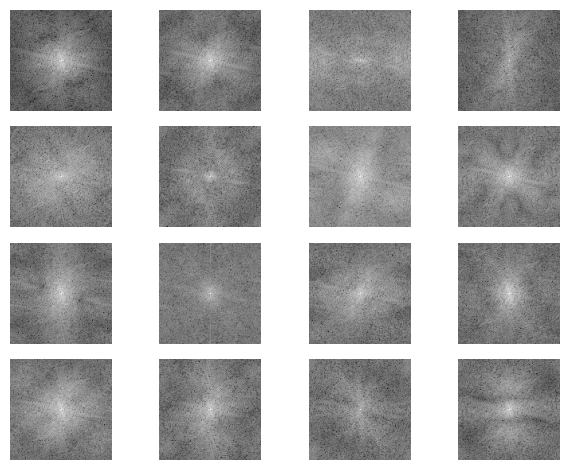

In [11]:
n_x, n_y = 4, 4

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(R1[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [12]:
R2.shape

torch.Size([1, 32, 64, 64])

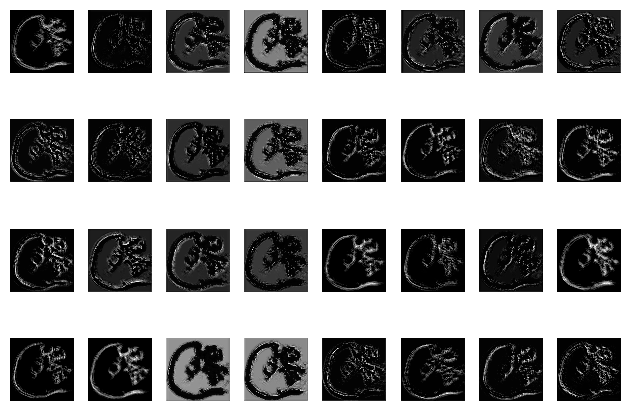

In [13]:
n_x, n_y = 4, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(R2[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

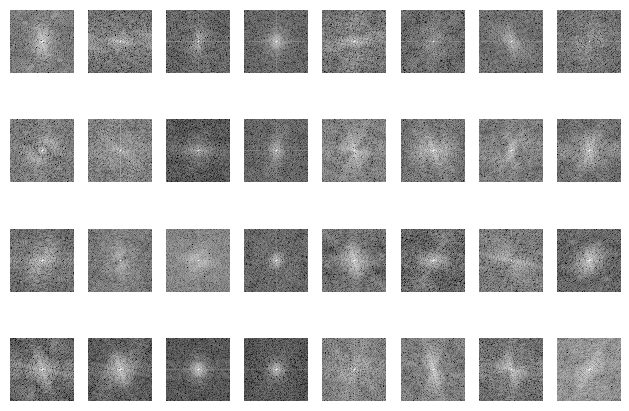

In [14]:
n_x, n_y = 4, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(R2[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [15]:
R3.shape

torch.Size([1, 64, 32, 32])

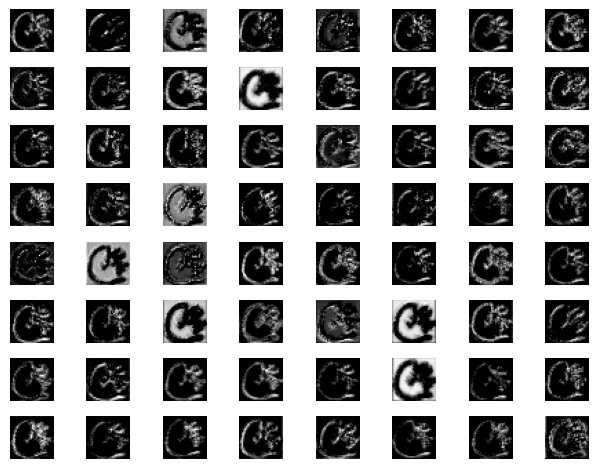

In [16]:
n_x, n_y = 8, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(R3[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

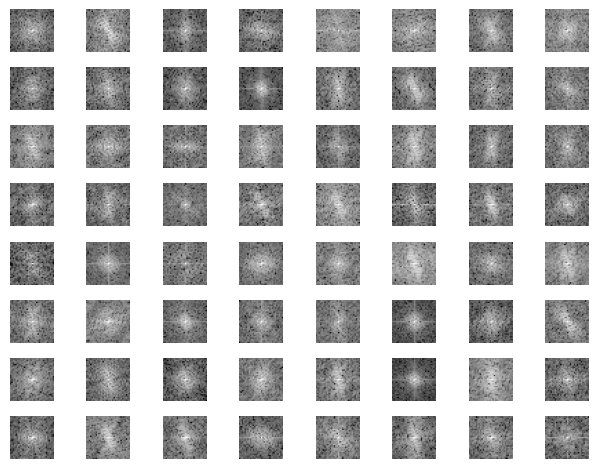

In [17]:
n_x, n_y = 8, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(R3[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [18]:
R4.shape

torch.Size([1, 128, 16, 16])

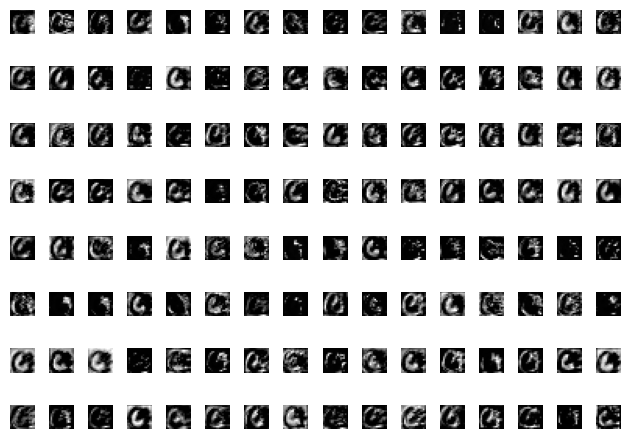

In [19]:
n_x, n_y = 8, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(R4[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

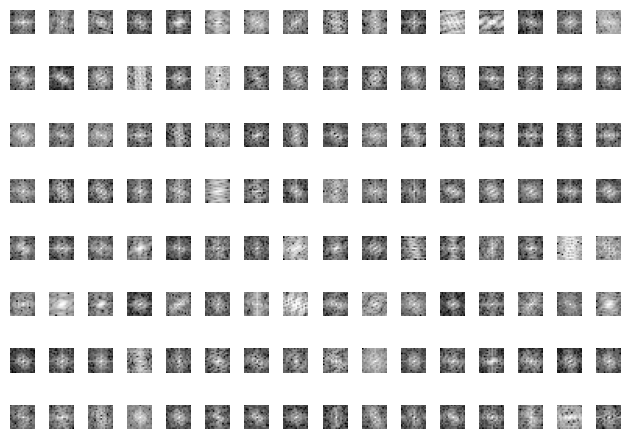

In [20]:
n_x, n_y = 8, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(R4[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [21]:
Y1.shape

torch.Size([1, 256, 8, 8])

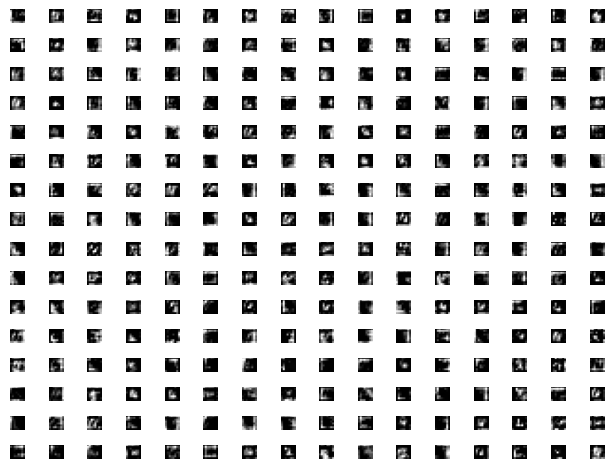

In [22]:
n_x, n_y = 16, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(Y1[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

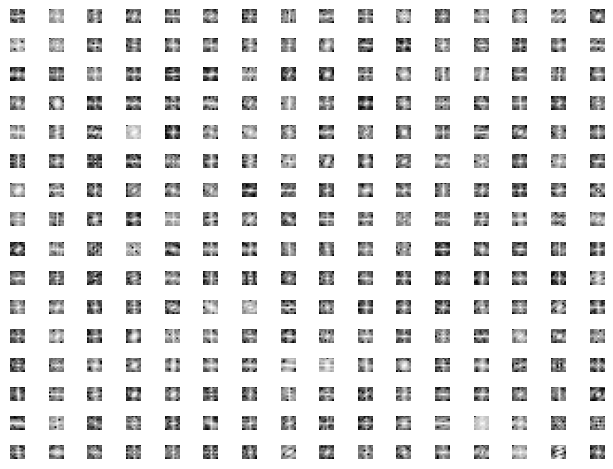

In [23]:
n_x, n_y = 16, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(Y1[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [24]:
O1.shape

torch.Size([1, 128, 16, 16])

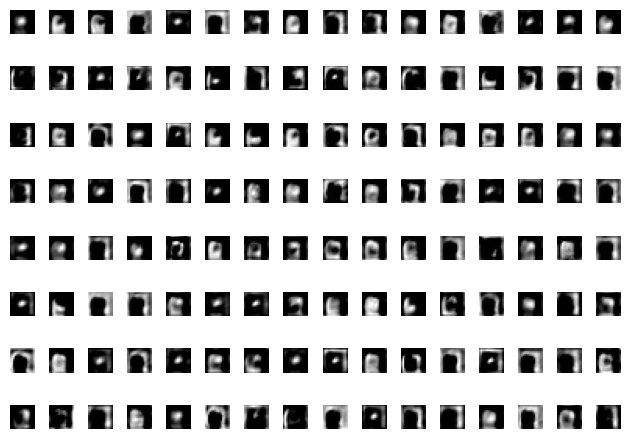

In [25]:
n_x, n_y = 8, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(O1[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

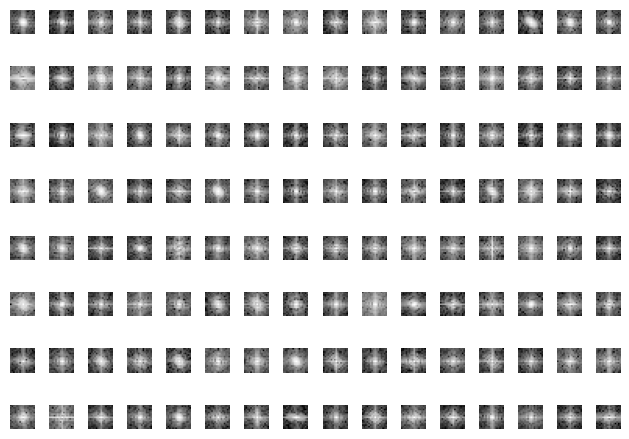

In [26]:
n_x, n_y = 8, 16

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(O1[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [27]:
O2.shape

torch.Size([1, 64, 32, 32])

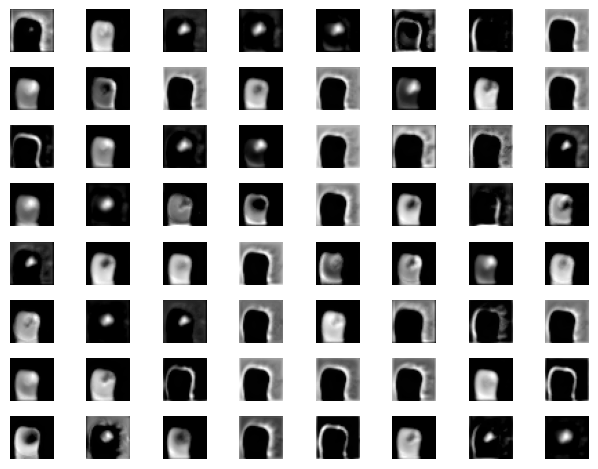

In [28]:
n_x, n_y = 8, 8 

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(O2[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

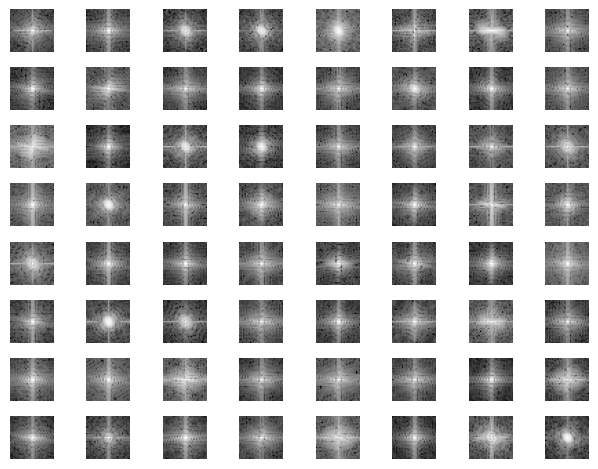

In [29]:
n_x, n_y = 8, 8 

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(O2[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [30]:
O3.shape

torch.Size([1, 32, 64, 64])

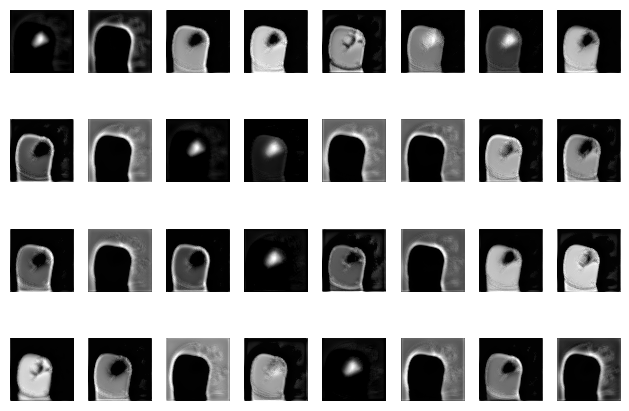

In [31]:
n_x, n_y = 4, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(O3[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

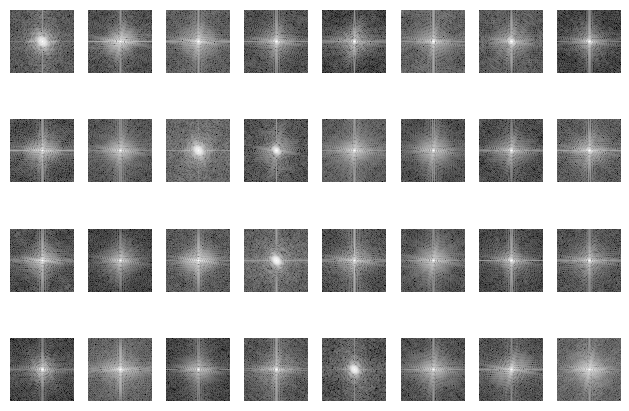

In [32]:
n_x, n_y = 4, 8

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(O3[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [33]:
O4.shape

torch.Size([1, 16, 128, 128])

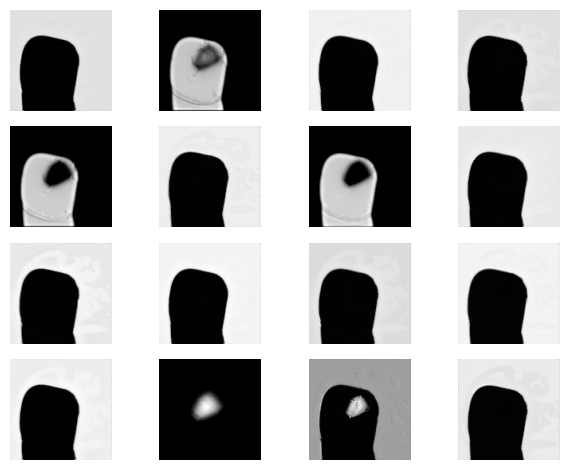

In [34]:
n_x, n_y = 4, 4

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(O4[0, i*n_y+j, :, :].detach().numpy().squeeze(), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

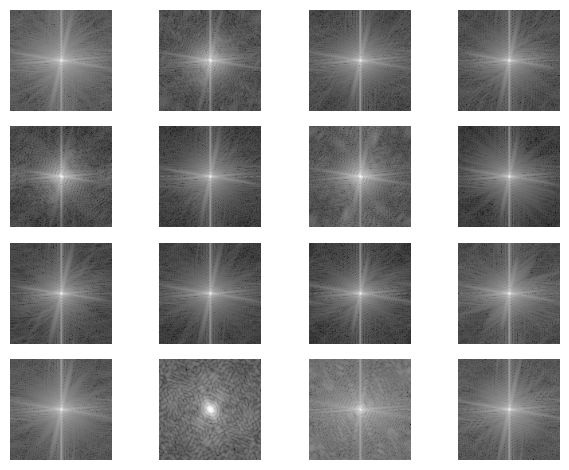

In [35]:
n_x, n_y = 4, 4

figure, ax = plt.subplots(n_x, n_y)

for i in range(n_x):
    for j in range(n_y):
        ax[i, j].imshow(trans_freq_dom(O4[0, i*n_y+j, :, :].detach().numpy().squeeze()), cmap='gray')
        ax[i, j].axis('off')
plt.tight_layout()

In [36]:
Y2.shape

torch.Size([1, 1, 128, 128])

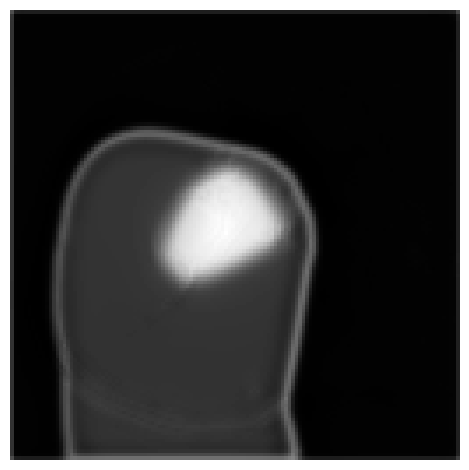

In [37]:
plt.imshow(Y2[0, 0, :, :].detach().numpy().squeeze(), cmap='gray')
plt.axis('off')
plt.tight_layout()

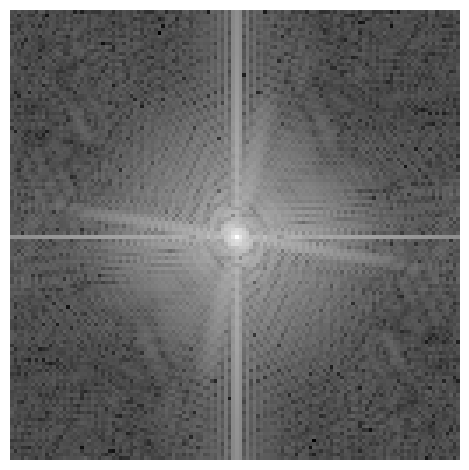

In [38]:
plt.imshow(trans_freq_dom(Y2[0, 0, :, :].detach().numpy().squeeze()), cmap='gray')
plt.axis('off')
plt.tight_layout()